In [292]:
from nltk.corpus import inaugural
from textblob import TextBlob
from textblob.taggers import NLTKTagger
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from os import path
import os
from scipy.ndimage import gaussian_gradient_magnitude

In [293]:
text = inaugural.raw(fileids=inaugural.fileids()[-5:])

nltk_tagger = NLTKTagger()
blob = TextBlob(text, pos_tagger=nltk_tagger)
nouns=' '.join([i for i,j in blob.pos_tags if j in ['NN','NNS','NNP','NNPS']])
adjectives=' '.join([i for i,j in blob.pos_tags if j in ['JJ','JJR','JJS']])

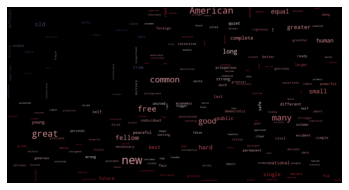

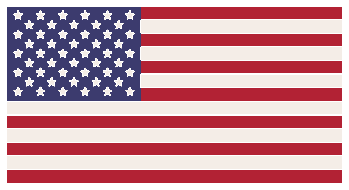

In [294]:
n="inf"
fname="flag"
words=adjectives
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

mask = np.array(Image.open(os.path.join(d, fname+".png")))
edges = np.mean([gaussian_gradient_magnitude(mask[:, :, i] / 255., 2) for i in range(3)], axis=0)
mask[edges > .08] = 255

wc = WordCloud(mask=mask, random_state=21)#, max_font_size=n
wc.generate(words)

image_colors = ImageColorGenerator(mask)
wc.recolor(color_func=image_colors)

plt.axis("off")
plt.imshow(wc, interpolation="bilinear")
plt.show()
wc.to_file(fname+str(n)+".png")

plt.axis("off")
plt.imshow(mask)
plt.show()